<a href="https://colab.research.google.com/github/ramaersam/Plastic-Injection-Quality-Checking-Inspection-Camera/blob/main/DaihatsuCategorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plt_image
plt.style.use('seaborn')

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as keras_image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout


In [4]:
import os
os.listdir () 

['.config', 'drive', 'sample_data']

In [5]:
os.listdir ('/content/drive/MyDrive/NEWDATASETDAIHATSU') 

['good', 'ngsc', 'ngsh', 'train', 'val']

In [6]:
print(len(os.listdir('/content/drive/MyDrive/NEWDATASETDAIHATSU/good')))
print(len(os.listdir('/content/drive/MyDrive/NEWDATASETDAIHATSU/ngsh')))
print(len(os.listdir('/content/drive/MyDrive/NEWDATASETDAIHATSU/ngsc')))

140
140
140


In [7]:
# Menginisiasi direktori file yang akan digunakan 
file_dir = '/content/drive/MyDrive/NEWDATASETDAIHATSU'

# Menginisiasi direktori train dan val
train_dir = os.path.join(file_dir,'train')
validation_dir = os.path.join(file_dir,'val')

In [7]:
# Membuat direktori train dan val
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [8]:
# Menginisiasi direktori 'rock','paper','scissors',
good_dir = os.path.join(file_dir,'good')
ngsh_dir = os.path.join(file_dir,'ngsh')
ngsc_dir = os.path.join(file_dir,'ngsc')

In [9]:
# Menggunakan library sklearn train test, Untuk memecah setiap data dalam directory
from sklearn.model_selection import train_test_split

In [10]:
# memecah direktori good menjadi data train dan data validation
train_good_dir, val_good_dir = train_test_split(os.listdir(good_dir), test_size = 0.4)

# memecah direktori ngsh menjadi data train dan data validation
train_ngsh_dir, val_ngsh_dir = train_test_split(os.listdir(ngsh_dir), test_size = 0.4)

# memecah direktori ngsc menjadi data train dan data validation
train_ngsc_dir, val_ngsc_dir = train_test_split(os.listdir(ngsc_dir), test_size = 0.4)

In [10]:
# Menginisiasi masing masing direktori train dan validation

train_good = os.path.join(train_dir, 'good')
train_ngsh = os.path.join(train_dir, 'ngsh')
train_ngsc = os.path.join(train_dir, 'ngsc')
val_good = os.path.join(validation_dir, 'good')
val_ngsh = os.path.join(validation_dir, 'ngsh')
val_ngsc = os.path.join(validation_dir, 'ngsc')

In [12]:
# membuat directory baru yang telah di insiasi di dalam directory train dan val

os.mkdir(train_good)
os.mkdir(train_ngsh)
os.mkdir(train_ngsc)

os.mkdir(val_good)
os.mkdir(val_ngsh)
os.mkdir(val_ngsc)

In [13]:
# mengcopy data train dan data val ke directory baru
import shutil

for i in train_good_dir:
  shutil.copy(os.path.join(good_dir, i), os.path.join(train_good,i))
for i in train_ngsh_dir:
  shutil.copy(os.path.join(ngsh_dir,i), os.path.join(train_ngsh,i))
for i in train_ngsc_dir:
  shutil.copy(os.path.join(ngsc_dir,i), os.path.join(train_ngsc,i))

for i in val_good_dir:
  shutil.copy(os.path.join(good_dir, i), os.path.join(val_good,i))
for i in val_ngsh_dir:
  shutil.copy(os.path.join(ngsh_dir,i), os.path.join(val_ngsh,i))
for i in val_ngsc_dir:
  shutil.copy(os.path.join(ngsc_dir,i), os.path.join(val_ngsc,i))

In [11]:
print(len(os.listdir('/content/drive/MyDrive/NEWDATASETDAIHATSU/train/good')))
print(len(os.listdir('/content/drive/MyDrive/NEWDATASETDAIHATSU/train/ngsh')))
print(len(os.listdir('/content/drive/MyDrive/NEWDATASETDAIHATSU/train/ngsc')))

84
84
84


In [12]:
print(len(os.listdir('/content/drive/MyDrive/NEWDATASETDAIHATSU/val/good')))
print(len(os.listdir('/content/drive/MyDrive/NEWDATASETDAIHATSU/val/ngsh')))
print(len(os.listdir('/content/drive/MyDrive/NEWDATASETDAIHATSU/val/ngsc')))

56
56
56


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plt_image
plt.style.use('seaborn')

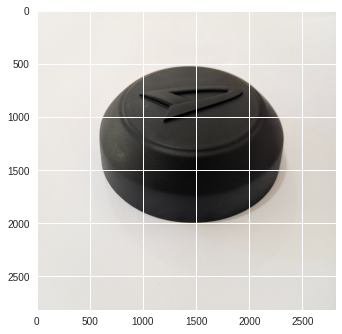

(2814, 2814, 3)


In [14]:
preview = plt_image.imread('/content/drive/MyDrive/NEWDATASETDAIHATSU/train/good/GOOD (100).jpg')
plt.imshow(preview)
plt.show()
print(preview.shape)

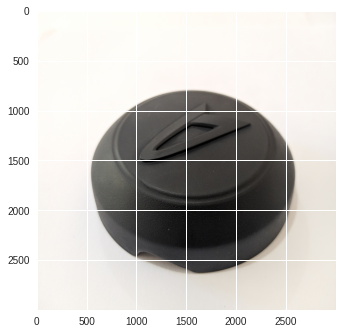

(3000, 3000, 3)


In [15]:
preview = plt_image.imread('/content/drive/MyDrive/NEWDATASETDAIHATSU/train/ngsh/NGSH (1).jpg')
plt.imshow(preview)
plt.show()
print(preview.shape)

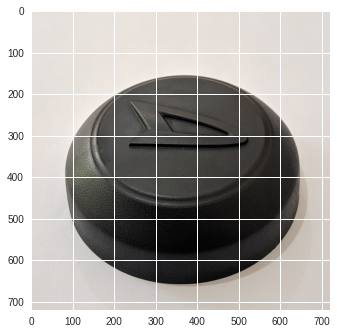

(720, 720, 3)


In [16]:
preview = plt_image.imread('/content/drive/MyDrive/NEWDATASETDAIHATSU/train/ngsc/NGSC (1).jpg')
plt.imshow(preview)
plt.show()
print(preview.shape)

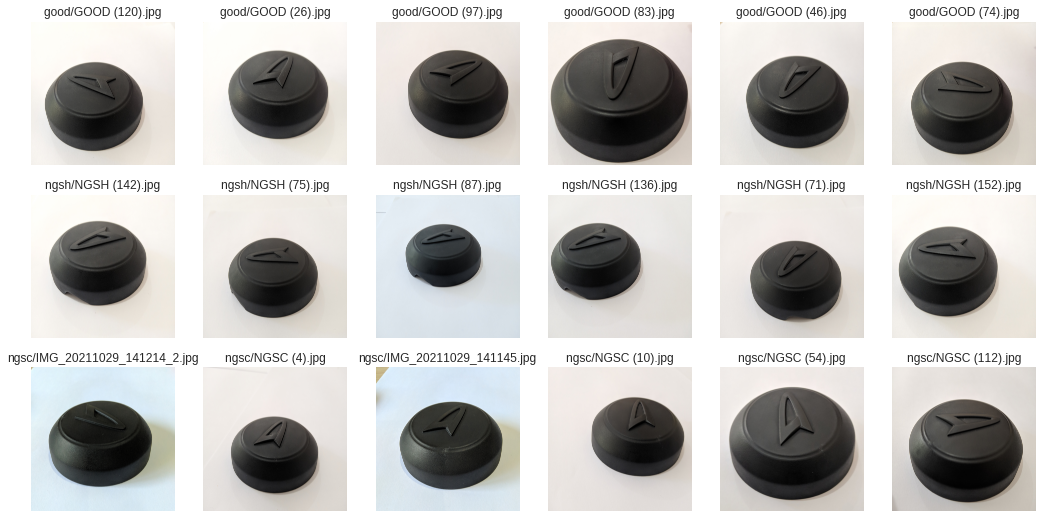

In [17]:
TOTAL = 6                                                                        # Total dari visualisasi gambar
index = np.random.randint(20)                                                    # untuk mengacak gambar

plt.figure(figsize=(3*TOTAL, 9))

list_good = [os.path.join('/content/drive/MyDrive/NEWDATASETDAIHATSU/train/good/', name) for name in os.listdir('/content/drive/MyDrive/NEWDATASETDAIHATSU/train/good')[index:index+TOTAL]]
list_ngsh = [os.path.join('/content/drive/MyDrive/NEWDATASETDAIHATSU/train/ngsh/', name) for name in os.listdir('/content/drive/MyDrive/NEWDATASETDAIHATSU/train/ngsh')[index:index+TOTAL]]
list_ngsc= [os.path.join('/content/drive/MyDrive/NEWDATASETDAIHATSU/train/ngsc/', name) for name in os.listdir('/content/drive/MyDrive/NEWDATASETDAIHATSU/train/ngsc')[index:index+TOTAL]]

for i, path in enumerate(list_good+list_ngsh+list_ngsc):
  plt.subplot(3, TOTAL, i+1)
  plt.axis('off')

  plt.title(path.replace('/content/drive/MyDrive/NEWDATASETDAIHATSU/train/', ''))
  img = plt_image.imread(path)
  plt.imshow(img)

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as keras_image

In [19]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [21]:
#runn
train_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=2,
      shear_range=0.05,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/NEWDATASETDAIHATSU/train',
    target_size=(500, 500),    # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=32,
    class_mode = 'categorical' # karena kita merupakan masalah klasifikasi lebih dari 2 kelas maka menggunakan class_mode = 'categorical'
)

val_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/NEWDATASETDAIHATSU/val',
    target_size=(500, 500),    # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=32,
    class_mode = 'categorical' # karena kita merupakan masalah klasifikasi lebih dari 2 kelas maka menggunakan class_mode = 'categorical'
)

Found 252 images belonging to 3 classes.
Found 168 images belonging to 3 classes.


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [23]:
base_model = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)),
                         MaxPool2D(2, 2),
                         Conv2D(64, (3, 3), activation='relu'),
                         MaxPool2D(2, 2),
                         Conv2D(128, (3, 3), activation='relu'),
                         MaxPool2D(2, 2),
                         Conv2D(256, (3, 3), activation='relu'),
                         MaxPool2D(2, 2),
                         Flatten(),
                         Dropout(0.5),
                         Dense(512, activation='relu'),
                         Dense(3, activation='softmax')])

base_model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 249, 249, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 128)      0

In [24]:
reduce_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(
                    monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto',
                    min_delta=0.0001, cooldown=3, min_lr=1e-8
                )

In [25]:
#@title Custom callbacks for Early Stopping
#I decide to write my own callback class for early stopping
#To added some flexibility
#Early stop if accuracy already hit more than 80% 
#and didnt significantly increased after that

class early_stop(tf.keras.callbacks.Callback):
  def __init__(self, threshold=0.97, patience=3, significance_val=0.001):
    super(early_stop, self).__init__()

    self.threshold = threshold                                                    #Minimum accuracy
    self.patience = patience                                                      #Limit epoch to wait if accuracy no longer increased
    self.significance_val = significance_val                                      #Significant value to mark improvement in accuracy
    self.best_weights = None                                                      #Best weights record
    self.is_reach_threshold = False                                               #Track if already reach threshold value or not
    self.best_epoch = 0                                                           #Track best epoch that produce best weights
    
  def on_train_begin(self, logs=None):
    self.previous_acc = 0                                                         #Track previous accuracy
    self.wait = 0                                                                 #Track epoch when accuracy no longer increased

  def on_epoch_end(self, epoch, logs={}):
    self.current_acc = logs.get('val_accuracy')                                   #Current epoch's validation accuracy

    if self.is_reach_threshold:
      if self.current_acc - self.previous_acc > self.significance_val:
        self.wait = 0
        self.previous_acc = self.current_acc
        self.best_weights = self.model.get_weights()
        self.best_epoch = epoch
        print('\n[INFO] Best weights updated!')
      else:
        self.wait += 1
        print(f'\n[INFO] Current wait = {self.wait}')
        if self.wait >= self.patience:
          self.model.stop_training = True
          print(f'\n[INFO] Validation Accuracy didnt increased after {self.patience} epochs, training stopped...')
          self.model.set_weights(self.best_weights)
          print(f'\n[INFO] Restoring best weights from epoch {self.best_epoch + 1} val_acc')
    
    if self.current_acc > self.threshold and not self.is_reach_threshold:
      self.is_reach_threshold = True
      self.previous_acc = self.current_acc
      self.best_weights = self.model.get_weights()
      self.best_epoch = epoch
      print('\n[INFO] Threshold reached! Best weights start here...')

In [26]:
my_calback_object = early_stop()

In [27]:
base_hist = base_model.fit(
    train_generator,
    epochs = 100,
    steps_per_epoch = int(252/32), 
    validation_data = val_generator,
    validation_steps= int(168/32),
    callbacks=[reduce_on_plateau, my_calback_object],
    verbose=1
)

Epoch 1/100
7/7 [==============================] - 187s 28s/step - loss: 5.8979 - accuracy: 0.3727 - val_loss: 1.0961 - val_accuracy: 0.3313 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 83s 13s/step - loss: 1.1506 - accuracy: 0.3045 - val_loss: 1.0854 - val_accuracy: 0.3313 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 68s 10s/step - loss: 1.0905 - accuracy: 0.3955 - val_loss: 1.0909 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 70s 11s/step - loss: 1.0099 - accuracy: 0.5455 - val_loss: 1.0413 - val_accuracy: 0.4437 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 71s 11s/step - loss: 0.9789 - accuracy: 0.5682 - val_loss: 0.9314 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/100
7/7 [==============================] - 69s 10s/step - loss: 0.9412 - accuracy: 0.5500 - val_loss: 0.9838 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 7/100
7/7 [==============================] - 82s 13s/step - loss: 0.9274 - 

In [28]:
#@title Fungsi untuk membantu melakukan plot Accuracy and Loss
def plot(hist):
  history = hist.history
  history['epoch'] = hist.epoch

  plt.figure(figsize=(12, 5))

  plt.subplot(121)
  plt.plot(history['epoch'], history['loss'], label='Loss')
  plt.plot(history['epoch'], history['val_loss'], label='Val Loss', color='orange')
  plt.legend()

  plt.subplot(122)
  plt.plot(history['epoch'], history['accuracy'], label='Acc')
  plt.plot(history['epoch'], history['val_accuracy'], label='Val Acc', color='orange')
  plt.legend()

  return plt.show()

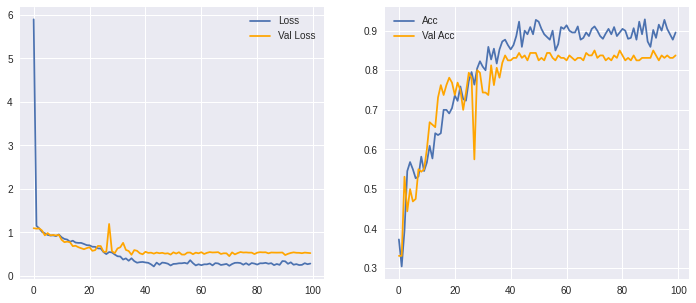

In [29]:
plot(base_hist)

In [30]:
# membuat direktori untuk menyimpan model yang telah dibuat
!mkdir '/content/drive/MyDrive/QCmodel' 
MODEL_PATH = '/content/drive/MyDrive/QCmodel'  
tf.saved_model.save(base_model, os.path.join(MODEL_PATH, 'saved_model'))

INFO:tensorflow:Assets written to: /content/drive/MyDrive/QCmodel/saved_model/assets


In [31]:
tf.keras.models.save_model(base_model, os.path.join(MODEL_PATH, 'base_model.h5'))

Saving NGSC (150).jpg to NGSC (150).jpg
NGSC (150).jpg
ngsc


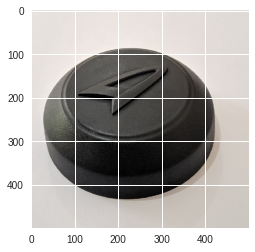

In [39]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline

classes = ['good','ngsc','ngsh']
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size = (500, 500))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  result = base_model.predict(images, batch_size=32)

  print(fn)
  print(classes[np.argmax(result)])